# The Relation of Education Spending on Literacy Rate
## Info about data

I found this dataset on Kaggle, and saw that it was collected by the World Bank. This dataset contains important education information such as the government expendature by percent of gdp on education, the adult literacy rate, primary school completion rate, primary/secondary school student to teacher ratios, and primary/secondary school enrollment rates. It contains observations for each of these variables over a time frame from 1999 to 2023. (https://www.kaggle.com/datasets/bushraqurban/world-education-dataset/data)

# Main Questions
In this analysis, I have come up with one major questions that I would like to analyze, over two different variables. I would like to find the relation between the percentage of gdp spent on education and the pupil/teacher ratio on the overall adult literacy rate. I think that when countries invest more of their money into education it will have a directly positive impact on the literacy rate of the country. I also think that if a country puts more focus onto training teachers to teach students for early life education, there will also be a positive effect on the literacy rate. If the pupil/teacher rate is lower, meaning there are less students per teacher, the students will get a more personalized education and be more likely to pick up essential skills like basic literacy. I also think that if a government spends more money proportionally to their GDP, they will be able to fund more educational incentives or open more schools, which will lead to higher literacy rates.

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [136]:
dataset = "world-education-data.csv"
df = pd.read_csv(dataset)

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   country_code                5892 non-null   object 
 2   year                        5892 non-null   int64  
 3   gov_exp_pct_gdp             4499 non-null   float64
 4   lit_rate_adult_pct          1877 non-null   float64
 5   pri_comp_rate_pct           4440 non-null   float64
 6   pupil_teacher_primary       3676 non-null   float64
 7   pupil_teacher_secondary     3017 non-null   float64
 8   school_enrol_primary_pct    5352 non-null   float64
 9   school_enrol_secondary_pct  4745 non-null   float64
 10  school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.5+ KB
None
              year  gov_exp_pct_gdp  lit_rate_adult_pct  pri_comp_rate_pct  \
count

# Description of variables
1. gov_exp_pct_gdp: this variable is a measure of the percentage of a country's gdp that is spent on funding for education.
2. lit_rate_adult_pct: this variable measures the literacy rate for adults (15 and up) as a percent of the population.
3. pri_comp_rate_pct: this is the percent of people who completed primary school in the country.
4. pupil_teacher_primary: this is the student to teacher ratio at the primary schools in the country.
5. pupil_teacher_secondary: this is the student to teacher ratio at the secondary schools in the country.
6. school_enrol_primary_pct: this is the enrollment in primary school as a percent of the population
7. school_enrol_secondary_pct: this is the percent enrollment in secondary school as a percent of the population
8. school_enrol_tertiary_pct: this is the percent enrollment in higher education in the country as a percent of population.

In [31]:
avg_df = df.groupby("country")[["gov_exp_pct_gdp", "lit_rate_adult_pct", "pri_comp_rate_pct", "pupil_teacher_primary", "pupil_teacher_secondary", "school_enrol_primary_pct", "school_enrol_secondary_pct"]].mean().reset_index()
# i did this to get the average for each column by country disregarding time, making it easier to analyze data by country
avg_df.describe()
avg_df.head()

,country,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct
0,Afghanistan,3.907689,33.917947,86.268707,43.685875,32.497248,91.509903,40.907854
1,Africa Eastern and Southern,4.430214,67.455002,63.956204,NaN,NaN,97.738373,37.565614
2,Africa Western and Central,2.758510,53.776327,65.228725,NaN,NaN,87.877678,37.141118
3,Albania,3.353569,97.719372,103.012090,19.630806,14.648866,103.056947,91.664498
4,Algeria,5.862894,74.851959,97.322319,24.972399,NaN,110.517974,83.731132


Now that the data has been averaged out for each country, I will break it down into different descriptive statistics that can help us visualize the effects that these variables have on literacy rate. 

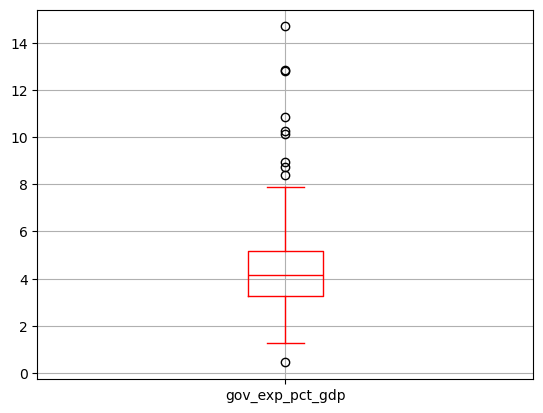

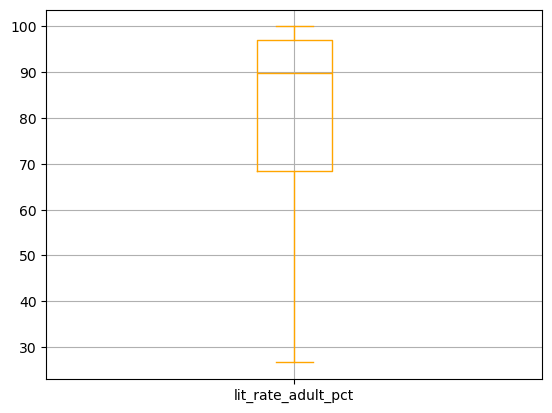

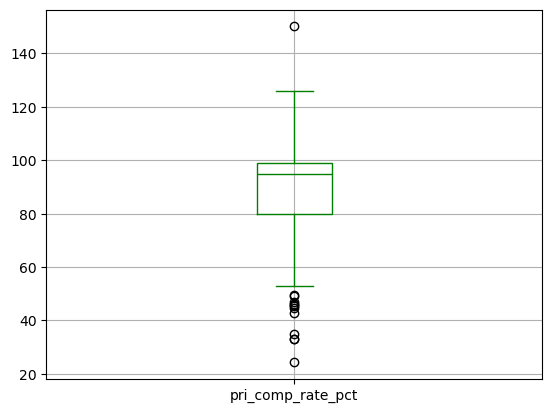

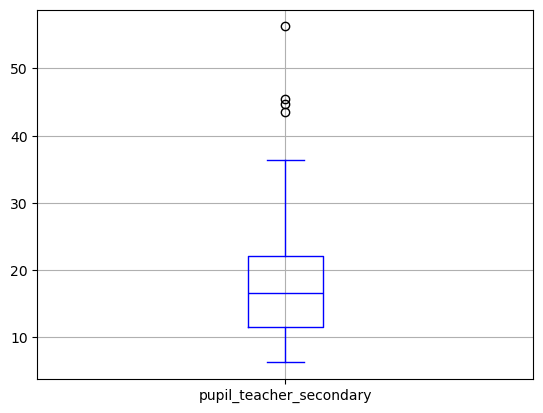

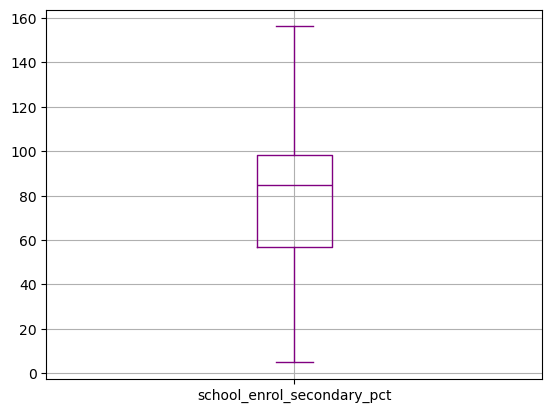

In [55]:
color = ["green", "yellow", "magenta", "orange", "teal"]
columns = ["gov_exp_pct_gdp", "lit_rate_adult_pct", "pri_comp_rate_pct", "pupil_teacher_secondary", "school_enrol_secondary_pct"]
for i, c in zip(columns, colors):
    avg_df.boxplot(column=i, color=c)
    plt.show()

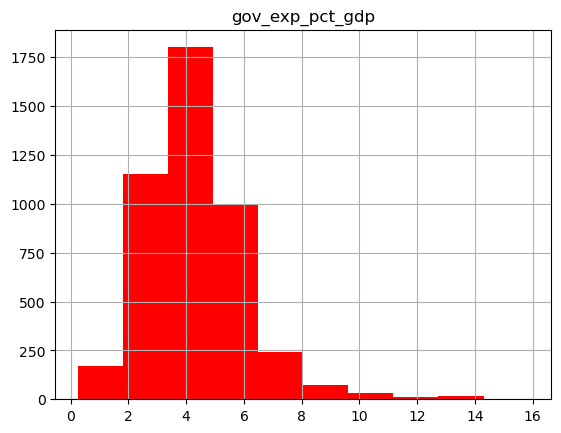

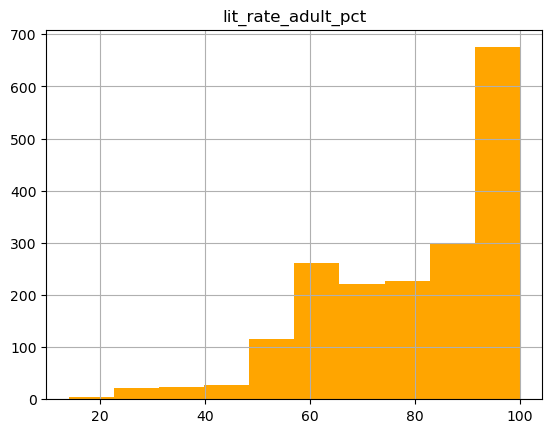

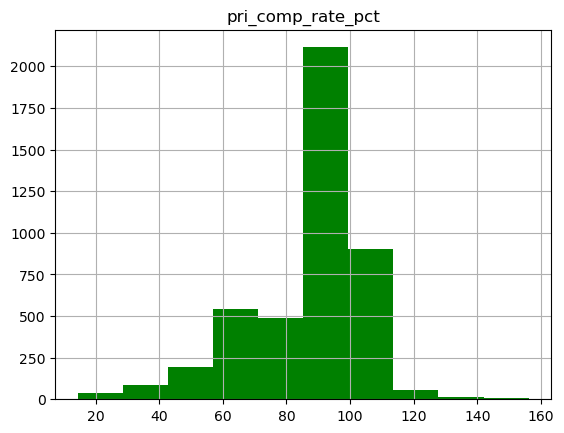

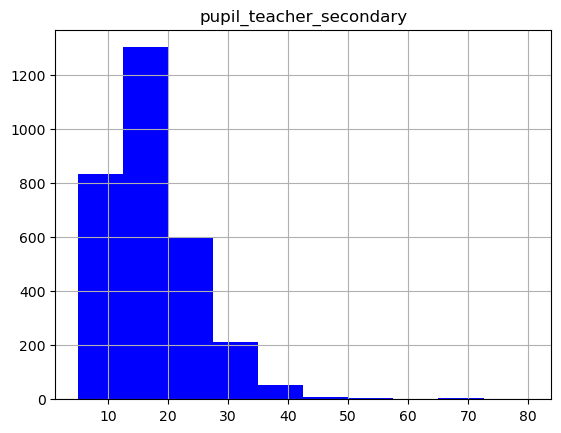

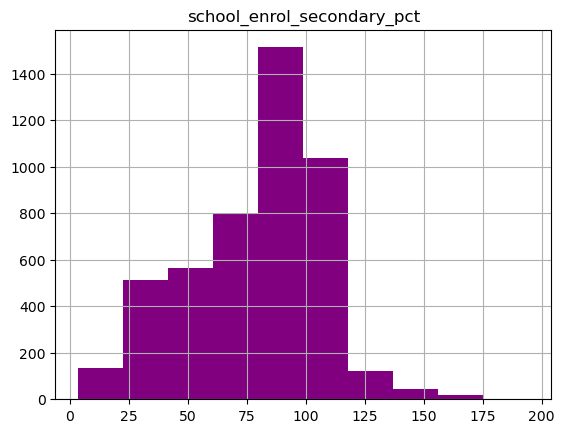

In [87]:
color = ["green", "yellow", "magenta", "orange", "teal"]
columns = ["gov_exp_pct_gdp", "lit_rate_adult_pct", "pri_comp_rate_pct", "pupil_teacher_secondary", "school_enrol_secondary_pct"]

for i, c in zip(columns,colors):
    df.hist(column=i,color=c)
    plt.show()

After looking at the histograms that were created to analyze this data and seeing how it is broken down, I was concerned to see that there were data points for certain countries that were meant to be percent of total population, but were above 100. I will still be analyzing this data, but will take those columns with a grain of salt. 

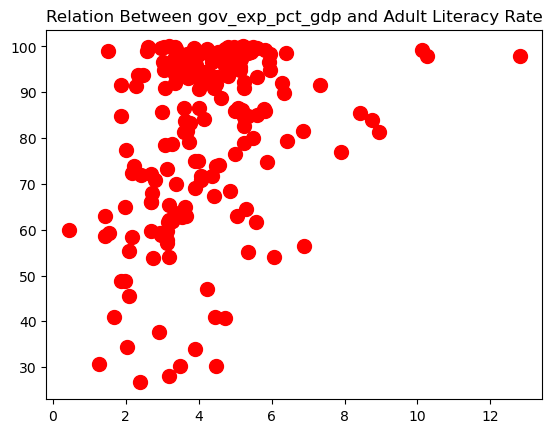

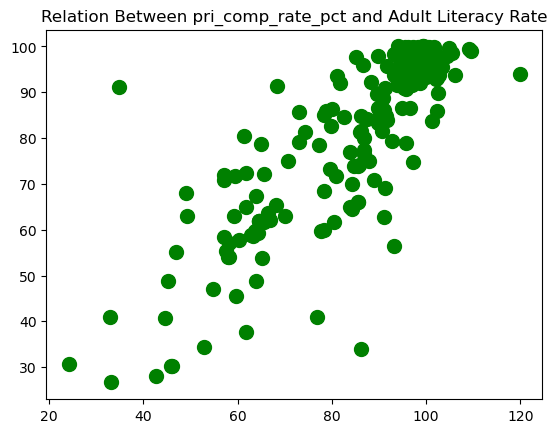

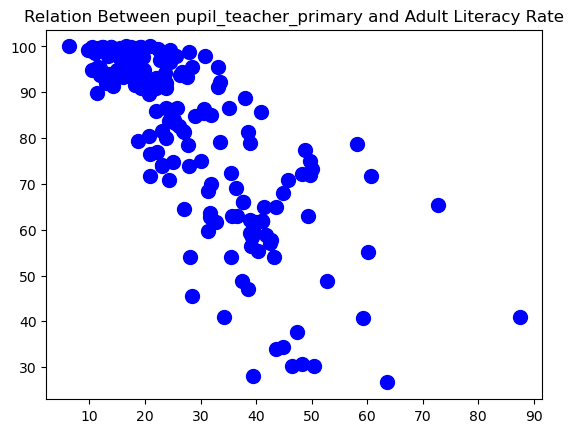

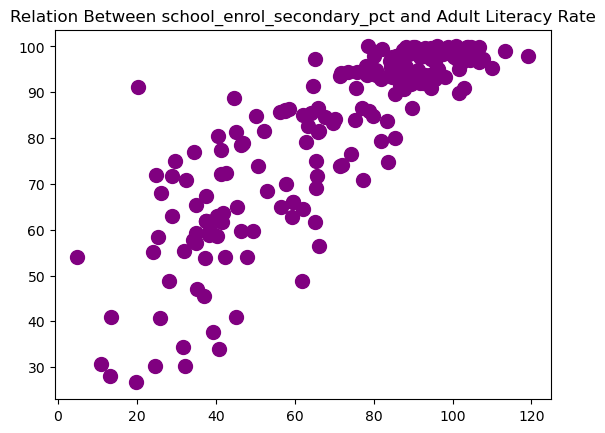

In [126]:
colors = ["red","green","blue","purple"]
columns = ["gov_exp_pct_gdp", "pri_comp_rate_pct", "pupil_teacher_primary", "school_enrol_secondary_pct"]
for i, c in zip(columns, colors):
    plt.scatter(avg_df[i], avg_df["lit_rate_adult_pct"], color = c, label = c, s=100)
    plt.title(f"Relation Between {i} and Adult Literacy Rate")
    plt.show()

These graphs show the distribution of the data and what help visualize what the averages across the countries look like for each catagory. The scatter plot in particular show me that there is definitely a correlation between certain variables and the literacy rate of the country. Particular variables that stood out to me as being correlated with it are school enrollment rates and primary school completion rate. We can also observe from the histograms where most of the datapoints are clustered for each variable. For example, there is a high density of points at the upper 90 range for literacy rate, due to many countries putting emphasis on education. You can also see that there is a sort of bell curve shape around 4 percent in the percent of gdp spent on education. 

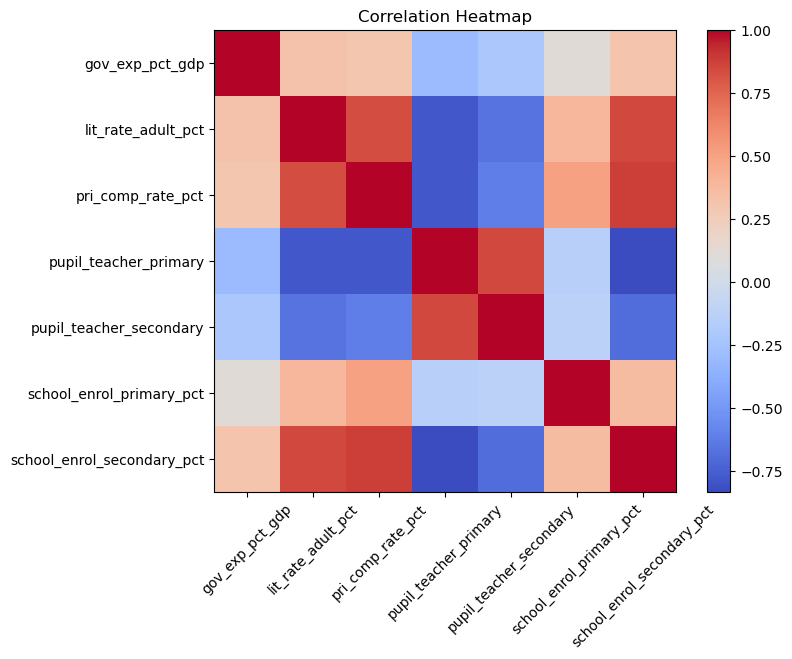

In [134]:
# correlation analysis
number_df = avg_df.select_dtypes(include=[np.number])
correlation = number_df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')  
plt.colorbar()

plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)

plt.title("Correlation Heatmap")
plt.show()

From the correlation heatmap above, we can see that certian variables are very highly correlated with eachother. Since we are analyzing the literacy rates specifically, it is clear that pupil_teacher_primary as well as pupil_teacher_secondary have a significant negative correlation, and school_enrol_secondary_pct has a significant positive correlation. 

Y = 65.7701573163051 + 3.7269052025611713 * X

R squared = 0.10598482447859381



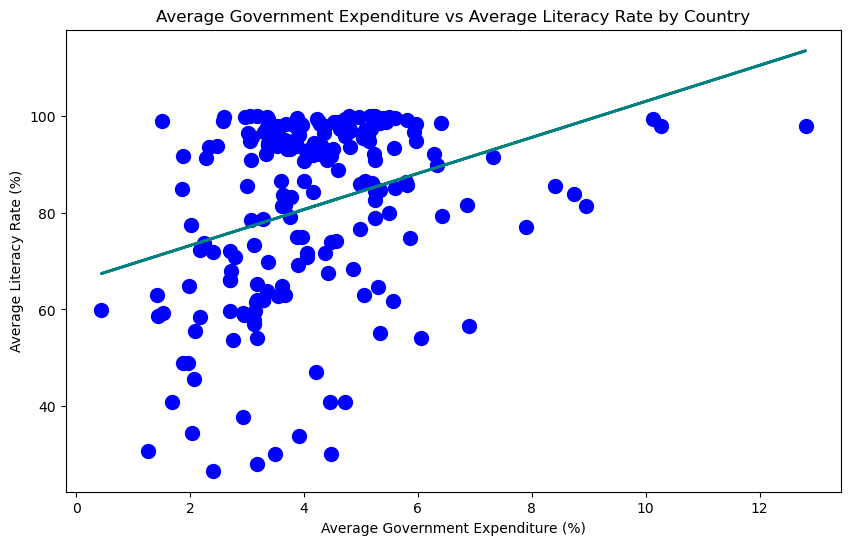

In [124]:
model = LinearRegression()
# reshape data to work for linear regression modeling
avg_df_reg = avg_df.dropna(subset = ["gov_exp_pct_gdp","lit_rate_adult_pct"])
x = avg_df_reg["gov_exp_pct_gdp"].values.reshape(-1,1)
y = avg_df_reg["lit_rate_adult_pct"].values

# make linear regression model
model.fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_
r_sq = model.score(x,y)
predicted_y = model.predict(x)

print(f"Y = {intercept} + {slope} * X\n")
print(f"R squared = {r_sq}")
print()

# make scatter plot and overlay the regression model on it
plt.figure(figsize=(10, 6))
plt.scatter(avg_df_reg['gov_exp_pct_gdp'], avg_df_reg['lit_rate_adult_pct'], color='blue', s=100)
plt.plot(avg_df_reg["gov_exp_pct_gdp"], predicted_y, color="teal", linewidth=2, label="Regression")

plt.title('Average Government Expenditure vs Average Literacy Rate by Country')
plt.xlabel('Average Government Expenditure (%)')
plt.ylabel('Average Literacy Rate (%)')

plt.show()

In the above model, we have made a regression line that to describe the data in the scatter plot. The Y intercept was found to be 65.77, and the slope was 3.727. This means that higher government expenditure on education had a positive correlation with the literacy rate in the country. However, I also found that the R squared value was only .106, so it only around 10% of the variation in the data is explained by the line. 

Y = 111.94500759388094 + -1.1017659626882397 * X

R squared = 0.6086243723732538



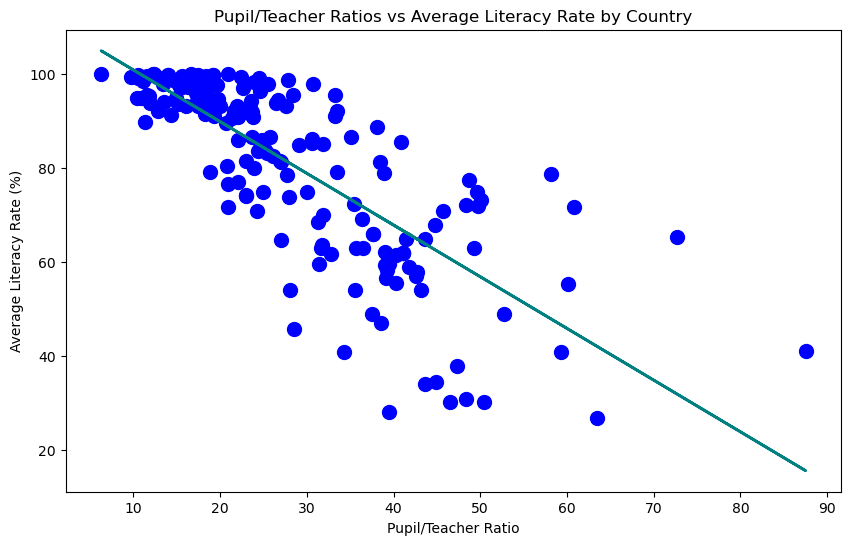

In [128]:
model = LinearRegression()
# reshape data to work for linear regression modeling
avg_df_reg = avg_df.dropna(subset = ["pupil_teacher_primary","lit_rate_adult_pct"])
x = avg_df_reg["pupil_teacher_primary"].values.reshape(-1,1)
y = avg_df_reg["lit_rate_adult_pct"].values

# make linear regression model
model.fit(x, y)
slope = model.coef_[0]
intercept = model.intercept_
r_sq = model.score(x,y)
predicted_y = model.predict(x)

print(f"Y = {intercept} + {slope} * X\n")
print(f"R squared = {r_sq}")
print()

# make scatter plot and overlay the regression model on it
plt.figure(figsize=(10, 6))
plt.scatter(avg_df_reg['pupil_teacher_primary'], avg_df_reg['lit_rate_adult_pct'], color='blue', s=100)
plt.plot(avg_df_reg["pupil_teacher_primary"], predicted_y, color="teal", linewidth=2, label="Regression")

plt.title('Pupil/Teacher Ratios vs Average Literacy Rate by Country')
plt.xlabel('Pupil/Teacher Ratio')
plt.ylabel('Average Literacy Rate (%)')

plt.show()

This regression equation has a much stronger correlation, and an R squared of .6, meaning more of the data's variance is explained by it. It also is negatively correlated, with a slope of -1.1, meaning if there is one less student per teacher, the literacy rate will go up by 1.1 percent. 

In [159]:
avg_df_reg = avg_df.dropna(subset = ["gov_exp_pct_gdp", "pri_comp_rate_pct", "pupil_teacher_primary", "pupil_teacher_secondary", "lit_rate_adult_pct"])
x = avg_df_reg[["gov_exp_pct_gdp", "pri_comp_rate_pct", "pupil_teacher_primary", "pupil_teacher_secondary"]]
y = avg_df_reg["lit_rate_adult_pct"]

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

print(f"Regression Equation: Y = {results.params[0]:.4f} + ", end="")
for var, coef in zip(x.columns[1:], results.params[1:]):
    print(f"{coef:.4f} * {var} + ", end="")
print("\n")

print(f"Model Summary:")
print(results.summary())

Regression Equation: Y = 30.0506 + 0.2163 * gov_exp_pct_gdp + 0.7245 * pri_comp_rate_pct + -0.0837 * pupil_teacher_primary + -0.4668 * pupil_teacher_secondary + 

Model Summary:
                            OLS Regression Results                            
Dep. Variable:     lit_rate_adult_pct   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     153.3
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           7.43e-57
Time:                        16:47:43   Log-Likelihood:                -667.14
No. Observations:                 185   AIC:                             1344.
Df Residuals:                     180   BIC:                             1360.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              co

C:\Users\Will\AppData\Local\Temp\ipykernel_34796\4067046123.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Regression Equation: Y = {results.params[0]:.4f} + ", end="")


## Regression Equation for my Dataframe
Y = 30.0506 + 0.2163 * gov_exp_pct_gdp + 0.7245 * pri_comp_rate_pct + -0.0837 * pupil_teacher_primary + -0.4668 * pupil_teacher_secondary 

# Conclusion
This study showed the relationship between multiple education related variables and the literacy rate of countries, focusing on GDP percent spent on education and the student teacher ratios of primary schools. We found that GDP percent had a very low positive correlation with literacy, and that pupil/teacher ratio had a stronger negative correlation. 

I believe that GDP did not correlate as strongly as I initiatally believed because it is does not take into account the GDP of said country, so wealthier countries can spend more money overall but since it is in percent terms it will look the same as a country that is poor. The decently strong correlation between student to teacher ratios and literacy makes sense, especially in primary schools, because if there are more teachers, there are more opprotunities for a student to get one on one attention and learn more thoroughly. This is also the age that students are learning basic reading skills, so it is more correlated than the secondary school time period. 

From this I can conclude that it would benefit a country to train more teachers for their schools, with a focus on primary schooling if they intend to improve their literacy rates. This is a pivotal time in a person's life, and if they can gain those important skills early in their life they will have an easier time succeeding later in life. 